In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1. Load the dataset into python environment

In [2]:
df = pd.read_csv(r'C:\Users\useme\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Q2. Make ‘PassengerId’ as the index column

In [4]:
df = pd.read_csv(r'C:\Users\useme\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Q3. Check the basic details of the dataset

In [6]:
df.shape

(891, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Q4. Fill in all the missing values present in all the columns in the dataset

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

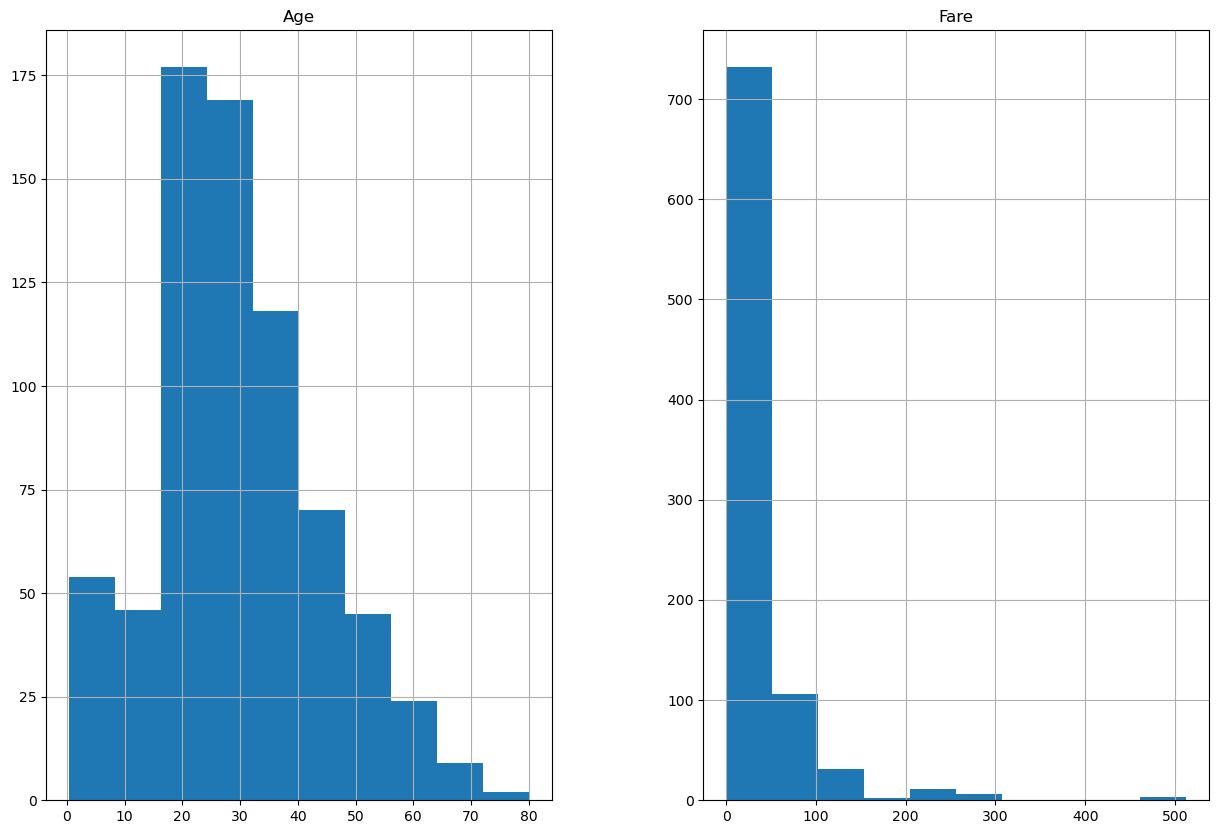

In [10]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [12]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [13]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Q5. Check and handle outliers in at least 3 columns in the dataset

In [15]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

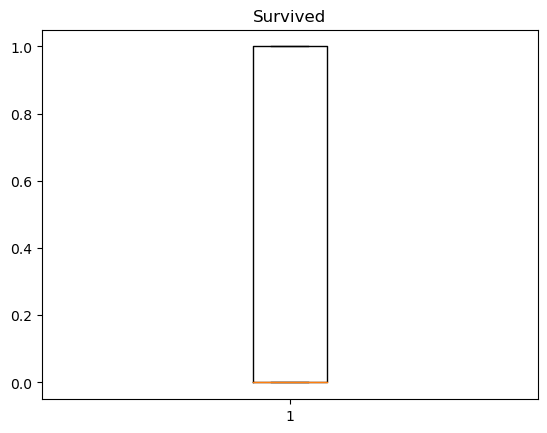

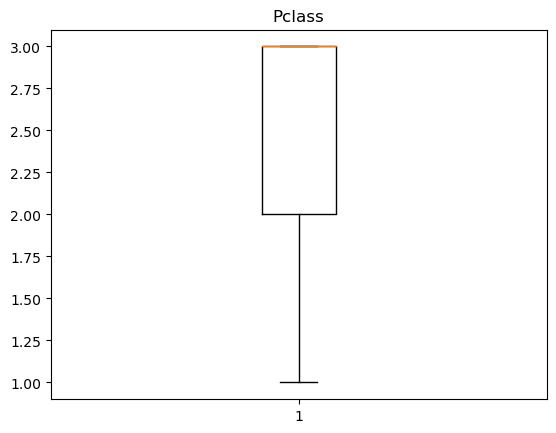

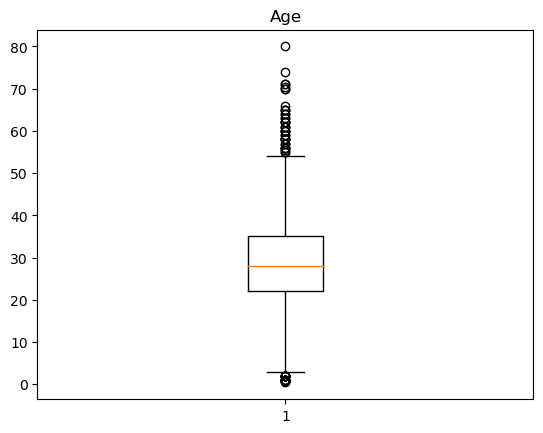

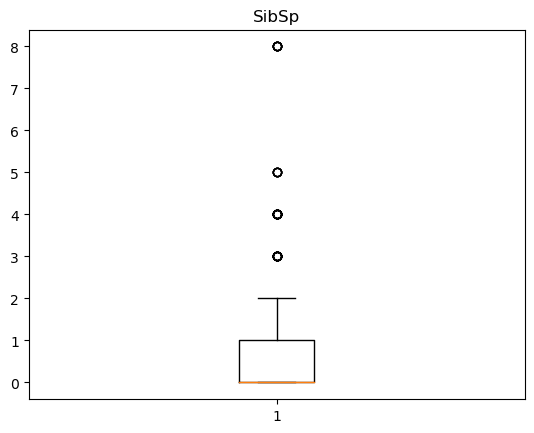

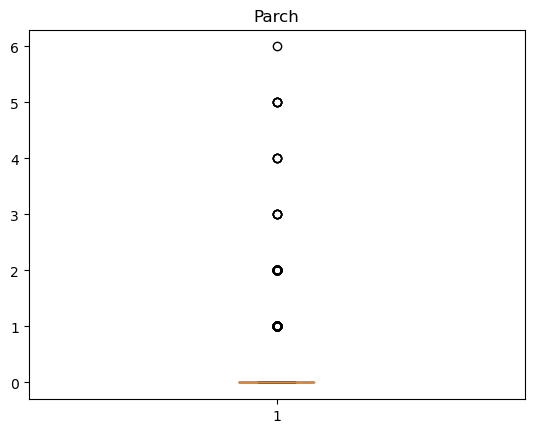

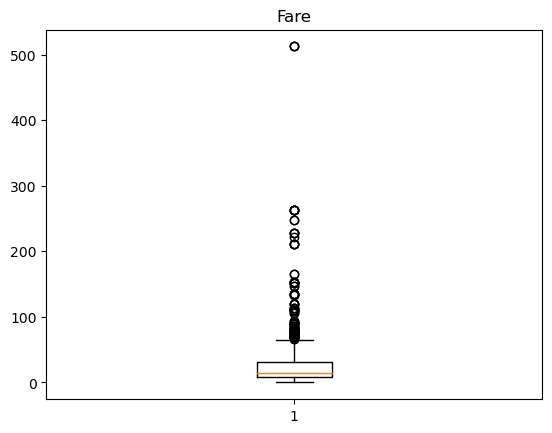

In [16]:
num_col=['Survived', 'Pclass','Age', 'SibSp', 'Parch','Fare']
for x in num_col:
    plt.figure()
    plt.boxplot(df[x])
    plt.title(x)

In [17]:
##outlier handling in Age column.

Q1 = df['Age'].quantile(0.25)
Q2 = df['Age'].quantile(0.50)
Q3 = df['Age'].quantile(0.75)

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

outlier=[]
for x in df['Age']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)
print('outliers = ',outlier)

Q1 =  22.0
Q2 =  28.0
Q3 =  35.0
IQR =  13.0
up_lim =  54.5
low_lim =  2.5
outliers =  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [18]:
ind = df['Age']>up_lim
df.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [19]:
df.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [20]:
df.shape

(849, 11)

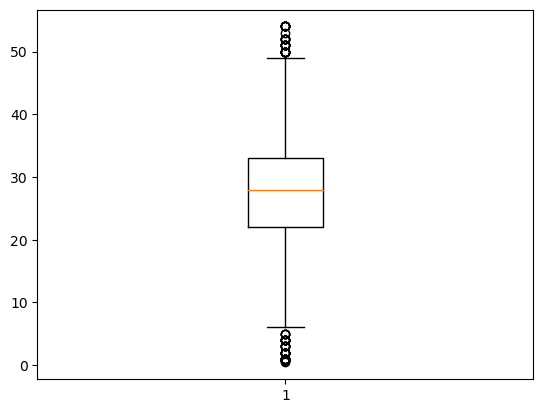

In [21]:
## Boxplot after outlier handling of Age column

plt.boxplot(df['Age'])
plt.show()

In [22]:
##outlier handling in SibSp column.

Q11 = df['SibSp'].quantile(0.25)
Q21 = df['SibSp'].quantile(0.50)
Q31 = df['SibSp'].quantile(0.75)

print('Q1 = ',Q11)
print('Q2 = ',Q21)
print('Q3 = ',Q31)

IQR1 = Q31-Q11
print('IQR = ',IQR1)

up_lim1 = Q31+1.5*IQR1
low_lim1 = Q11-1.5*IQR1
print('up_lim = ',up_lim1)
print('low_lim = ',low_lim1)

outlier1=[]
for x in df['SibSp']:
    if (x<low_lim1) or (x>up_lim1):
        outlier1.append(x)
print('outliers = ',outlier1)

Q1 =  0.0
Q2 =  0.0
Q3 =  1.0
IQR =  1.0
up_lim =  2.5
low_lim =  -1.5
outliers =  [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [23]:
ind1 = df['SibSp']>up_lim1
df.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [24]:
df.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

In [25]:
df.shape

(803, 11)

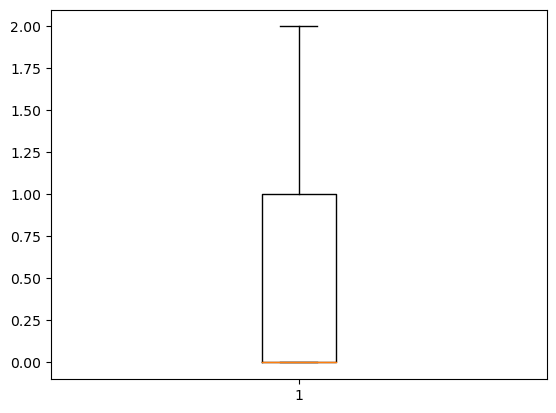

In [26]:
## Boxplot after outlier handling of SibSp column
plt.boxplot(df['SibSp'])
plt.show()

In [27]:
##outlier handling in Fare column.

Q12 = df['Fare'].quantile(0.25)
Q22 = df['Fare'].quantile(0.50)
Q32 = df['Fare'].quantile(0.75)

print('Q1 = ',Q12)
print('Q2 = ',Q22)
print('Q3 = ',Q32)

IQR2 = Q32-Q12
print('IQR = ',IQR2)

up_lim2 = Q32+1.5*IQR2
low_lim2 = Q12-1.5*IQR2
print('up_lim = ',up_lim2)
print('low_lim = ',low_lim2)

outlier2=[]
for x in df['Fare']:
    if (x<low_lim2) or (x>up_lim2):
        outlier2.append(x)
print('outliers = ',outlier2)

Q1 =  7.8958
Q2 =  13.0
Q3 =  27.825
IQR =  19.929199999999998
up_lim =  57.7188
low_lim =  -21.997999999999998
outliers =  [71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


In [28]:
ind2 = df['Fare']>up_lim2
indices=df.loc[ind2].index.tolist()
print(indices)

[2, 32, 35, 53, 62, 63, 73, 93, 98, 103, 119, 121, 125, 140, 152, 156, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 326, 330, 333, 335, 337, 338, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 514, 521, 524, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 790, 803, 821, 836, 850, 857]


In [29]:
df.drop([2, 32, 35, 53, 62, 63, 73, 93, 98, 103, 119, 121, 125, 140, 152, 156, 216, 219, 225, 231,
         246, 257, 258, 259, 263, 270, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 326,
         330, 333, 335, 337, 338, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485,
         487, 497, 499, 505, 506, 514, 521, 524, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592,
         610, 616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742,
         743, 755, 760, 764, 766, 780, 790, 803, 821, 836, 850, 857],inplace=True)

In [30]:
df.shape

(699, 11)

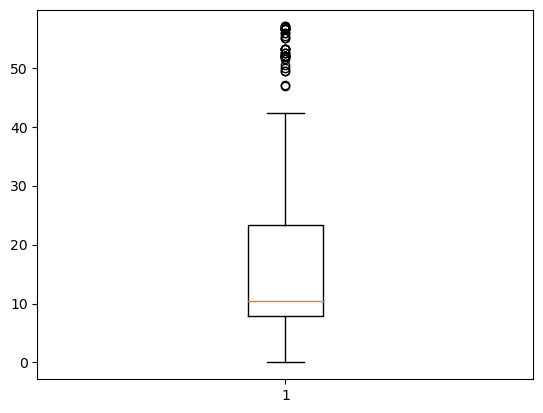

In [31]:
## Boxplot after outlier handling of Fare column
plt.boxplot(df['Fare'])
plt.show()

# Q6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [32]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [33]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,2.505007,28.023247,0.283262,0.288984,16.407015
std,0.710878,10.150850,0.513310,0.764193,12.559295
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.877100
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,32.750000,1.000000,0.000000,23.250000
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [34]:
x1 = x.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [35]:
x1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
min_max = MinMaxScaler()

In [38]:
x1 = min_max.fit_transform(x1)

In [39]:
type(x1)

numpy.ndarray

In [40]:
x1 = pd.DataFrame(x1,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [41]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.752504,0.515178,0.141631,0.048164,0.287842
std,0.355439,0.189452,0.256655,0.127365,0.220339
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.402762,0.000000,0.000000,0.138195
50%,1.000000,0.514744,0.000000,0.000000,0.184211
75%,1.000000,0.603397,0.500000,0.000000,0.407895
max,1.000000,1.000000,1.000000,1.000000,1.000000
